In [0]:
%matplotlib inline


Deep Learning with PyTorch
**************************

Deep Learning Building Blocks: Affine maps, non-linearities and objectives
==========================================================================

Deep learning consists of composing linearities with non-linearities in clever ways. The introduction of non-linearities allows for powerful models. In this section, we will play with these core components, make up an objective function, and see how the model is trained.


### Affine Maps


One of the core workhorses of deep learning is the affine map, which is
a function $f(x)$ where

\begin{align}f(x) = Ax + b\end{align}

for a matrix $A$ and vectors $x, b$. The parameters to be
learned here are $A$ and $b$. Often, $b$ is refered to
as the *bias* term.





In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [5]:
lin = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b
lin

Linear(in_features=5, out_features=3, bias=True)

In [6]:
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(2, 5)

lin(data)

tensor([[-0.3739,  0.1399, -0.0294],
        [-0.3064,  0.3383,  0.3914]], grad_fn=<AddmmBackward>)


In [7]:
lin(data).shape

torch.Size([2, 3])

### Non-Linearities


### Why we need non-linearities. 
Suppose we have two affine maps
$f(x) = Ax + b$ and $g(x) = Cx + d$. What is
$f(g(x))$?

\begin{align}f(g(x)) = A(Cx + d) + b = ACx + (Ad + b)\end{align}

$AC$ is a matrix and $Ad + b$ is a vector, so we see that composing affine maps gives you an affine map.


### if we create our nn by long chain of affine chains of affine compositions, this adds no new power to your model
### than just doing a single affine map.

### If we introduce non-linearities in between the affine layers, this is no longer the case, and we can build much ### more powerful models.

### There are a few core non-linearities.
$\tanh(x), \sigma(x), \text{ReLU}(x)$ are the most common. You are
probably wondering: "why these functions? I can think of plenty of other
non-linearities." The reason for this is that they have gradients that
are easy to compute, and computing gradients is essential for learning.
For example

\begin{align}\frac{d\sigma}{dx} = \sigma(x)(1 - \sigma(x))\end{align}


## Imp:
* None linearities dont have parameters to learn
* they dont have weight

In [0]:
data = torch.randn(2, 2)
print(data)
print(F.relu(data))

### Softmax and Probabilities


#### This takes in a vector of real numbers and returns a probability distribution. Its definition is as follows. 
Let $x$ be a vector of real numbers (positive, negative, whatever,
there are no constraints). Then the i'th component of
$\text{Softmax}(x)$ is

\begin{align}\frac{\exp(x_i)}{\sum_j \exp(x_j)}\end{align}

output is a probability distribution: each
element is non-negative and the sum over all components is 1.




In [0]:
# Softmax is also in torch.nn.functional
data = torch.randn(5)
print(data)
print(F.softmax(data, dim=0))
print(F.softmax(data, dim=0).sum())  # Sums to 1 because it is a distribution!
print(F.log_softmax(data, dim=0))  # theres also log_softmax

# Simple neurak network in pytorch

Text(0, 0.5, 'Output')

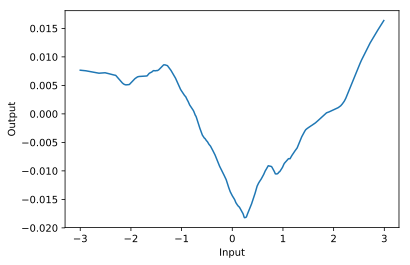

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import torch
import torch.nn as nn
import torch.optim as optim


torch.manual_seed(0)
model = nn.Sequential(nn.Linear(1,100), nn.ReLU(), 
                      nn.Linear(100,100), nn.ReLU(), 
                      nn.Linear(100,100), nn.ReLU(), 
                      nn.Linear(100,1))
opt = optim.SGD(model.parameters(),lr=1e-2)
for _ in range(100):
    loss = nn.MSELoss()(model(torch.randn(100,1)), torch.randn(100,1))
    opt.zero_grad()
    loss.backward()
    opt.step()
                      
plt.plot(np.arange(-3,3,0.01), model(torch.arange(-3,3,0.01)[:,None]).detach().numpy())
plt.xlabel("Input")
plt.ylabel("Output")